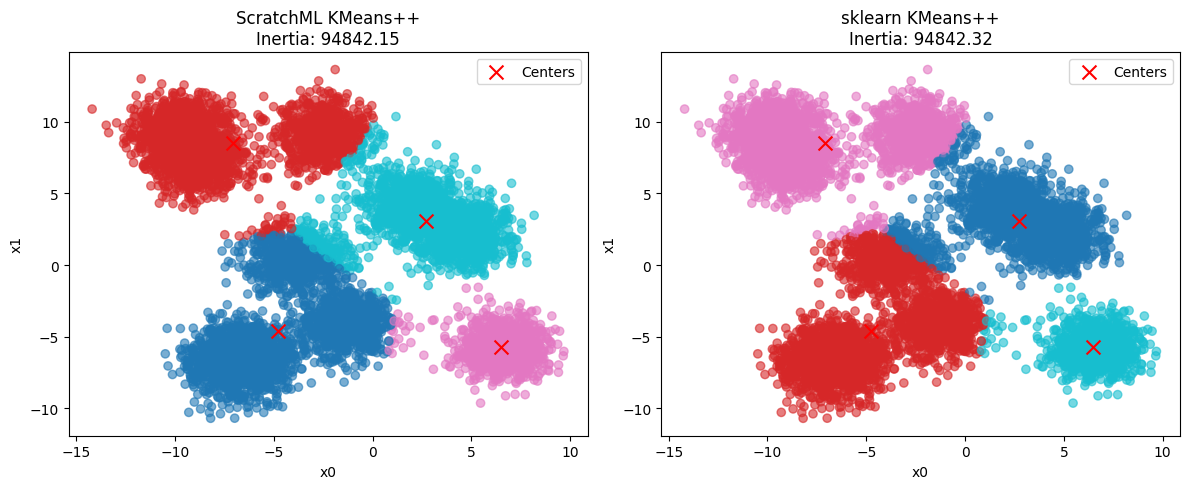

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SklearnKMeans
from ScratchML.clustering.kmeans import KMeans

# Генерируем синтетический датасет
X, y_true = make_blobs(n_samples=8000, centers=10, cluster_std=1.2, random_state=42)

# Параметры
params = dict(n_clusters=4, n_init=10, max_iter=300, random_state=42)

# Обучаем наши KMeans и sklearn KMeans
my_kmeans = KMeans(**params).fit(X)
sk_kmeans = SklearnKMeans(**params).fit(X)

# Визуализация
plt.figure(figsize=(12, 5))
for i, (labels, centers, title) in enumerate([
    (my_kmeans.labels_, my_kmeans.cluster_centers_, "ScratchML KMeans++"),
    (sk_kmeans.labels_, sk_kmeans.cluster_centers_, "sklearn KMeans++")
]):
    plt.subplot(1, 2, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centers')
    plt.title(f"{title}\nInertia: {np.sum((X - centers[labels])**2):.2f}")
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.legend()
plt.tight_layout()
plt.show()

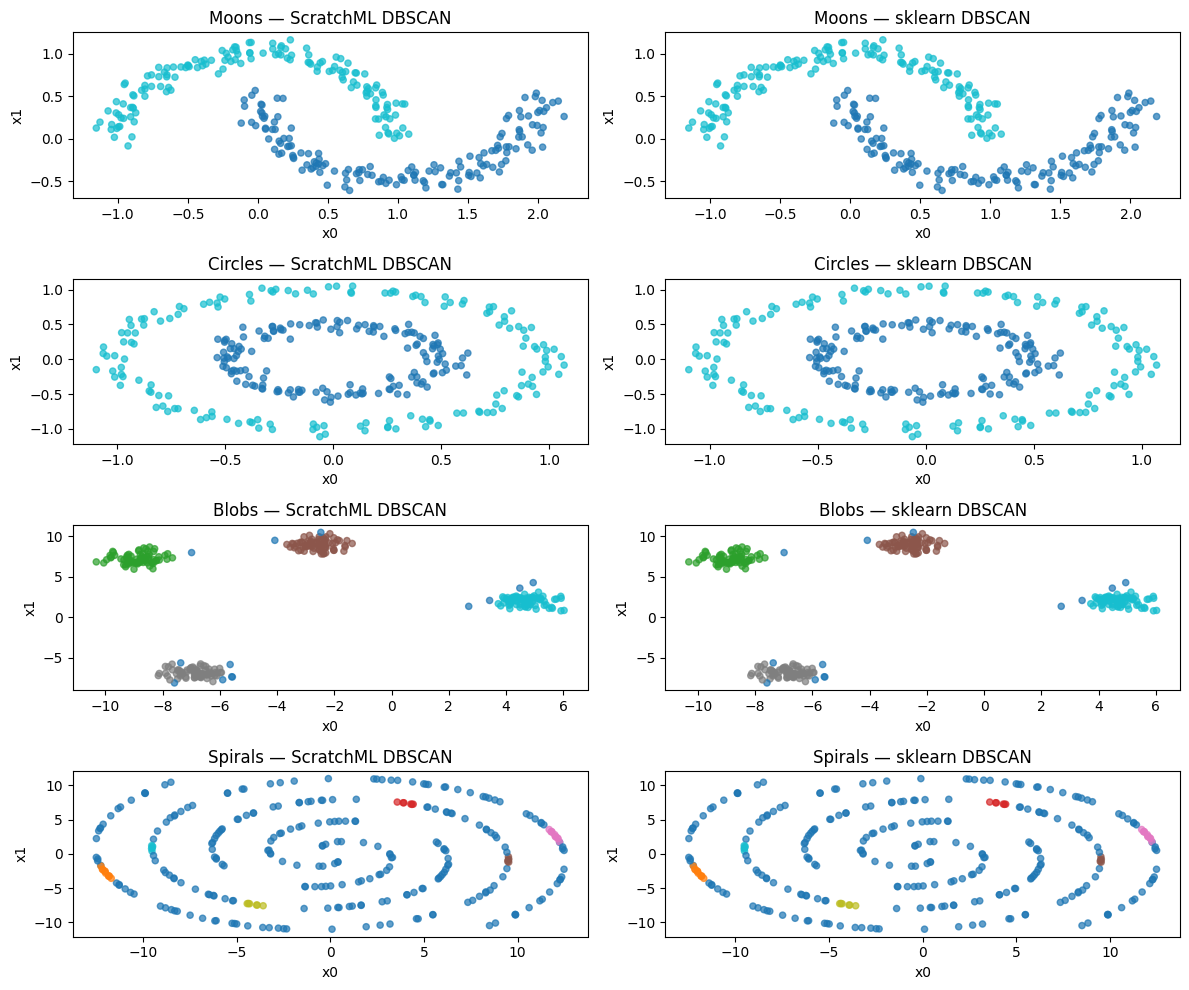

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.cluster import DBSCAN as SklearnDBSCAN
from ScratchML.clustering.dbscan import DBSCAN

# Функция генерации вложенных спиралей
def make_spirals(n_points=300, noise=0.05):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    X = np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y))))
    return X

datasets = [
    ("Moons", make_moons(n_samples=300, noise=0.07, random_state=42)[0], dict(eps=0.2, min_samples=5)),
    ("Circles", make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)[0], dict(eps=0.2, min_samples=5)),
    ("Blobs", make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)[0], dict(eps=0.5, min_samples=5)),
    ("Spirals", make_spirals(150, noise=0.08), dict(eps=0.5, min_samples=5)),
]

plt.figure(figsize=(12, 10))
for j, (name, X, params) in enumerate(datasets):
    my_db = DBSCAN(**params).fit(X)
    sk_db = SklearnDBSCAN(**params).fit(X)
    for i, (labels, title) in enumerate([
        (my_db.labels_, "ScratchML DBSCAN"),
        (sk_db.labels_, "sklearn DBSCAN")
    ]):
        plt.subplot(len(datasets), 2, j*2 + i + 1)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.7, s=20)
        plt.title(f"{name} — {title}")
        plt.xlabel("x0")
        plt.ylabel("x1")
plt.tight_layout()
plt.show()

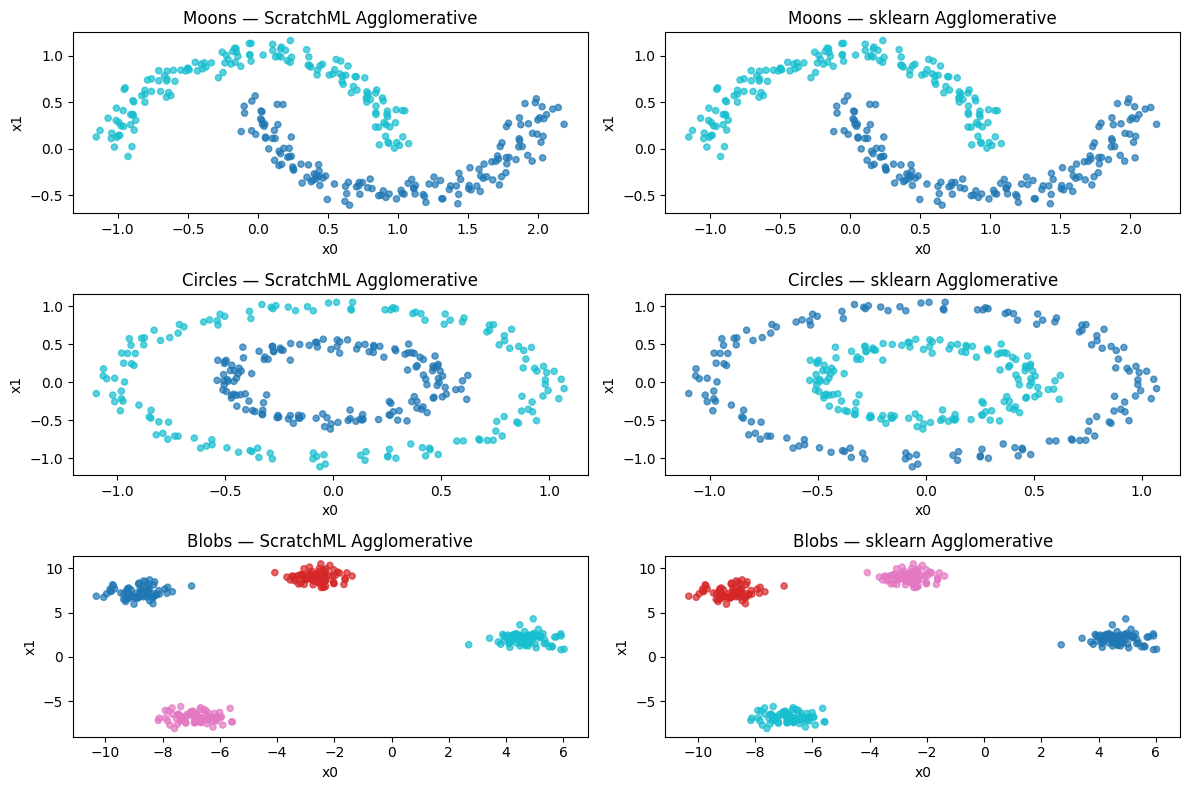

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.cluster import AgglomerativeClustering as SklearnAgglomerative
from ScratchML.clustering.agglomerative import AgglomerativeClustering

datasets = [
    ("Moons", make_moons(n_samples=300, noise=0.07, random_state=42)[0], 2),
    ("Circles", make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)[0], 2),
    ("Blobs", make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)[0], 4),
]

plt.figure(figsize=(12, 8))
for j, (name, X, n_clusters) in enumerate(datasets):
    my_agg = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
    sk_agg = SklearnAgglomerative(n_clusters=n_clusters, linkage='single').fit(X)
    for i, (labels, title) in enumerate([
        (my_agg.labels_, "ScratchML Agglomerative"),
        (sk_agg.labels_, "sklearn Agglomerative")
    ]):
        plt.subplot(len(datasets), 2, j*2 + i + 1)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.7, s=20)
        plt.title(f"{name} — {title}")
        plt.xlabel("x0")
        plt.ylabel("x1")
plt.tight_layout()
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as SklearnLR
from ScratchML.linear.linear_regression import LinearRegression
from ScratchML.utils.metrics import rmse, r2

# --- Датасет с точным решением ---
np.random.seed(42)
n_samples, n_features = 200, 5
X = np.random.randn(n_samples, n_features)
true_coef = np.array([2.0, -3.0, 1.5, 0.0, 4.0])
y = X @ true_coef + 5.0 + np.random.randn(n_samples) * 0.1  # почти без шума

params = dict(fit_intercept=True)

my_lr = LinearRegression(**params).fit(X, y)
sk_lr = SklearnLR(**params).fit(X, y)

print("=== Точное решение ===")
print("ScratchML coef:", my_lr.coef_)
print("ScratchML intercept:", my_lr.intercept_)
print("sklearn coef:", sk_lr.coef_)
print("sklearn intercept:", sk_lr.intercept_)
print("ScratchML RMSE:", rmse(y, my_lr.predict(X)))
print("sklearn RMSE:", rmse(y, sk_lr.predict(X)))
print("ScratchML R2:", r2(y, my_lr.predict(X)))
print("sklearn R2:", r2(y, sk_lr.predict(X)))

=== Точное решение ===
ScratchML coef: [ 1.994993   -2.99328942  1.5012956   0.00540141  4.00415705]
ScratchML intercept: 5.01278440985687
sklearn coef: [ 1.994993   -2.99328942  1.5012956   0.00540141  4.00415705]
sklearn intercept: 5.012784409856871
ScratchML RMSE: 0.10217400387132583
sklearn RMSE: 0.10217400387132587
ScratchML R2: 0.9996736673107406
sklearn R2: 0.9996736673107406


In [11]:
# --- Датасет с линейными комбинациями между признаками ---
np.random.seed(42)
n_samples, n_features = 200, 5
X_base = np.random.randn(n_samples, n_features-1)
X_extra = (X_base[:, 0] + X_base[:, 1]).reshape(-1, 1)  # линейная комбинация первых двух признаков
X = np.hstack([X_base, X_extra])
true_coef = np.array([1.0, 2.0, -1.0, 0.5, 3.0])
y = X @ true_coef + 2.0 + np.random.randn(n_samples) * 0.2

my_lr = LinearRegression(**params).fit(X, y)
sk_lr = SklearnLR(**params).fit(X, y)

print("\n=== Линейные комбинации между признаками ===")
print("ScratchML coef:", my_lr.coef_)
print("ScratchML intercept:", my_lr.intercept_)
print("sklearn coef:", sk_lr.coef_)
print("sklearn intercept:", sk_lr.intercept_)
print("ScratchML RMSE:", rmse(y, my_lr.predict(X)))
print("sklearn RMSE:", rmse(y, sk_lr.predict(X)))
print("ScratchML R2:", r2(y, my_lr.predict(X)))
print("sklearn R2:", r2(y, sk_lr.predict(X)))


=== Линейные комбинации между признаками ===
ScratchML coef: [-2.34472061e+13 -2.34472061e+13 -9.98485858e-01  4.99896573e-01
  2.34472061e+13]
ScratchML intercept: 2.0253768684707176
sklearn coef: [ 1.01365122  1.98591493 -0.99989486  0.49876937  2.99956615]
sklearn intercept: 2.026440391887151
ScratchML RMSE: 0.5525060555863457
sklearn RMSE: 0.18973712829895553
ScratchML R2: 0.9914423601950707
sklearn R2: 0.998990782983599


In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression as SklearnLR
from ScratchML.linear.linear_regression import LinearRegression
from ScratchML.utils.metrics import rmse, r2

# --- Датасет: признаков больше, чем объектов ---
np.random.seed(42)
n_samples, n_features = 20, 30  # признаков больше, чем объектов
X = np.random.randn(n_samples, n_features)
true_coef = np.random.randn(n_features)
y = X @ true_coef + 1.0 + np.random.randn(n_samples) * 0.1

params = dict(fit_intercept=True)

my_lr = LinearRegression(**params).fit(X, y)
sk_lr = SklearnLR(**params).fit(X, y)

print("=== Признаков больше, чем объектов ===")
print("ScratchML RMSE:", rmse(y, my_lr.predict(X)))
print("sklearn RMSE:", rmse(y, sk_lr.predict(X)))
print("ScratchML R2:", r2(y, my_lr.predict(X)))
print("sklearn R2:", r2(y, sk_lr.predict(X)))
print("ScratchML coef (первые 5):", my_lr.coef_[:5])
print("sklearn coef (первые 5):", sk_lr.coef_[:5])
print("ScratchML intercept:", my_lr.intercept_)
print("sklearn intercept:", sk_lr.intercept_)

=== Признаков больше, чем объектов ===
ScratchML RMSE: 1.055562457927638e-14
sklearn RMSE: 6.8341532060773326e-15
ScratchML R2: 1.0
sklearn R2: 1.0
ScratchML coef (первые 5): [ 0.56559825 -0.768261    0.93125567 -0.03344173 -0.3869243 ]
sklearn coef (первые 5): [ 0.50424638 -0.88353898  0.98323227 -0.10325439 -0.39403344]
ScratchML intercept: 0.7647161094271213
sklearn intercept: 1.2521505334692287


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression as Sklinreg

# создадим искусственные данные
np.random.seed(0)
X = np.random.randn(100, 10)
w_true = np.arange(1, 11)
y = X.dot(w_true) + np.random.randn(100) * 0.1

# свой SVD‑вариант
U, S, VT = np.linalg.svd(X - X.mean(axis=0), full_matrices=False)
S_inv = np.diag(1 / S)
w_svd = VT.T.dot(S_inv).dot(U.T).dot(y - y.mean())

# sklearn
model = Sklinreg().fit(X, y)
w_sk = model.coef_

model_2 = LinearRegression(**params).fit(X, y)
w_my = model_2.coef_
print("||w_svd - w_true|| =", np.linalg.norm(w_svd - w_true))
print("||w_sk  - w_true|| =", np.linalg.norm(w_sk  - w_true))
print("||w_my  - w_true|| =", np.linalg.norm(w_my  - w_true))


||w_svd - w_true|| = 0.03828419415981937
||w_sk  - w_true|| = 0.03828419415981435
||w_my  - w_true|| = 0.03828419415981435


=== Синтетика ===
ScratchML accuracy: 0.825
sklearn accuracy: 0.825


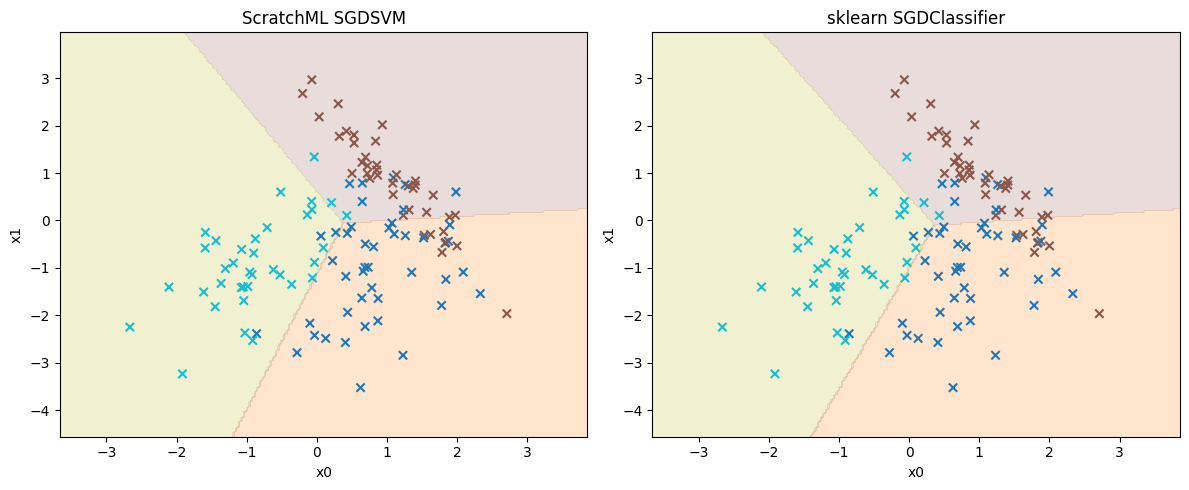


=== Iris ===
ScratchML accuracy: 0.8888888888888888
sklearn accuracy: 1.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris
from sklearn.linear_model import SGDClassifier as SklearnSGD
from sklearn.model_selection import train_test_split
from ScratchML.svm.sgd_svm import SGDSVMClassifier
from ScratchML.optim.sgd import SGD
from ScratchML.regularization.l2 import L2
from ScratchML.utils.metrics import accuracy

# --- Синтетика (2D, 3 класса) ---
X, y = make_classification(n_samples=400, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_classes=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

params = dict(optimizer=SGD(lr=0.01), regularizer=L2(alpha=0.01), n_iter=1000, batch_size=32, fit_intercept=True, random_state=42, C=1.0)
my_svm = SGDSVMClassifier(**params).fit(X_train, y_train)
sk_svm = SklearnSGD(loss='hinge', penalty='l2', alpha=0.01, max_iter=1000, tol=1e-3, random_state=42).fit(X_train, y_train)

print("=== Синтетика ===")
print("ScratchML accuracy:", accuracy(y_test, my_svm.predict(X_test)))
print("sklearn accuracy:", accuracy(y_test, sk_svm.predict(X_test)))

plt.figure(figsize=(12, 5))
for i, (model, title) in enumerate([(my_svm, "ScratchML SGDSVM"), (sk_svm, "sklearn SGDClassifier")]):
    plt.subplot(1, 2, i+1)
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)
    plt.contourf(xx, yy, preds, alpha=0.2, levels=np.arange(4)-0.5, cmap='tab10')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='tab10', marker='x', label='test')
    plt.title(title)
    plt.xlabel("x0")
    plt.ylabel("x1")
plt.tight_layout()
plt.show()

# --- Реальный датасет (iris, мультикласс) ---
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

my_svm = SGDSVMClassifier(**params).fit(X_train, y_train)
sk_svm = SklearnSGD(loss='hinge', penalty='l2', alpha=0.01, max_iter=1000, tol=1e-3, random_state=42).fit(X_train, y_train)

print("\n=== Iris ===")
print("ScratchML accuracy:", accuracy(y_test, my_svm.predict(X_test)))
print("sklearn accuracy:", accuracy(y_test, sk_svm.predict(X_test)))

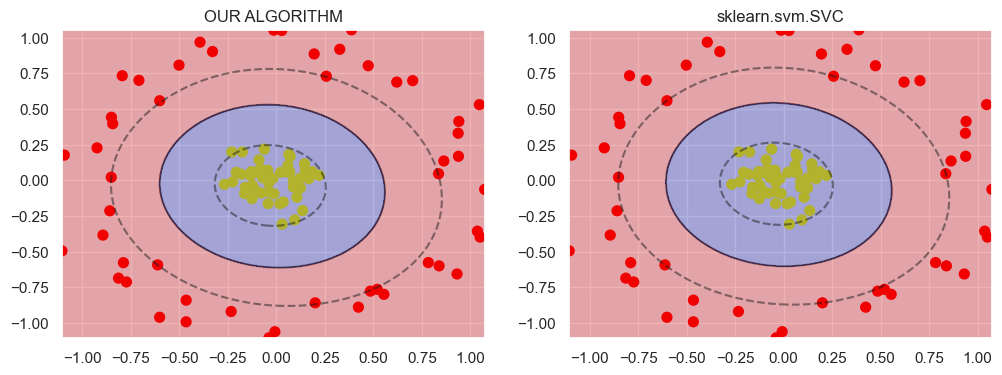

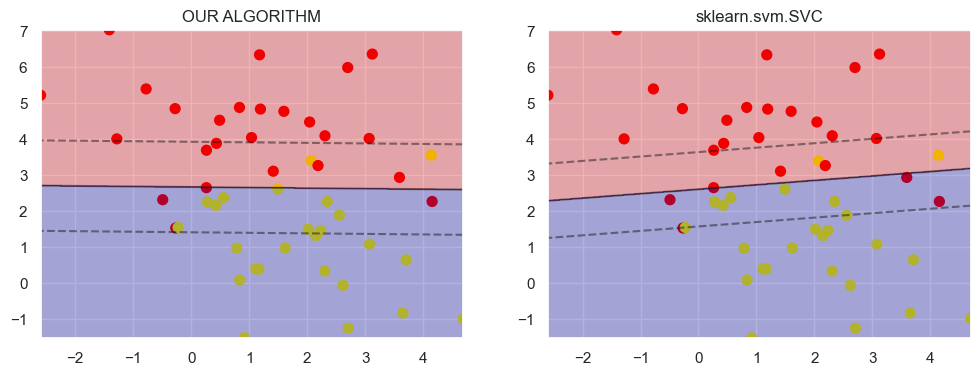

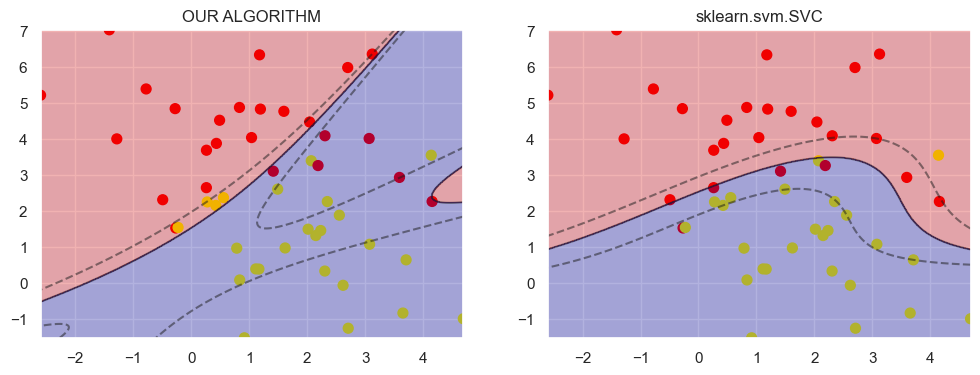

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.svm import SVC as SklearnSVC
from sklearn.datasets import make_blobs, make_circles
from matplotlib.colors import ListedColormap
from ScratchML.svm.svm_kkt import SVC

def test_plot(X, y, svm_model, axes, title):
    plt.sca(axes)
    xlim = [np.min(X[:, 0]), np.max(X[:, 0])]
    ylim = [np.min(X[:, 1]), np.max(X[:, 1])]
    xx, yy = np.meshgrid(np.linspace(*xlim, num=700), np.linspace(*ylim, num=700))
    rgb = np.array([[210, 0, 0], [0, 0, 150]]) / 255.0

    svm_model.fit(X, y)
    z_model = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plt.contour(xx, yy, z_model, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.contourf(xx, yy, np.sign(z_model), alpha=0.3, levels=2, cmap=ListedColormap(rgb), zorder=1)
    plt.title(title)

# --- Круги (RBF kernel) ---
X, y = make_circles(100, factor=.1, noise=.1)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
test_plot(X, y, SVC(kernel='rbf', C=10, max_iter=60, gamma=1), axs[0], 'OUR ALGORITHM')
test_plot(X, y, SklearnSVC(kernel='rbf', C=10, gamma=1), axs[1], 'sklearn.svm.SVC')
plt.show()

# --- Blobs (linear kernel) ---
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=1.4)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
test_plot(X, y, SVC(kernel='linear', C=10, max_iter=60), axs[0], 'OUR ALGORITHM')
test_plot(X, y, SklearnSVC(kernel='linear', C=10), axs[1], 'sklearn.svm.SVC')
plt.show()

# --- Blobs (poly kernel) ---
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
test_plot(X, y, SVC(kernel='poly', C=5, max_iter=60, degree=3), axs[0], 'OUR ALGORITHM')
test_plot(X, y, SklearnSVC(kernel='poly', C=5, degree=3), axs[1], 'sklearn.svm.SVC')
plt.show()